## CS GO training models


In [11]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler

In [12]:
data = pd.read_csv("/content/csgo_round_snapshots.csv")

In [13]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68714,89.91,4.0,2.0,de_cache,False,500.0,400.0,486.0,400.0,16450.0,...,4.0,3.0,4.0,4.0,0.0,0.0,3.0,0.0,0.0,T
68715,69.91,4.0,2.0,de_cache,False,400.0,400.0,386.0,400.0,14050.0,...,3.0,2.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,T
68716,49.88,4.0,2.0,de_cache,False,400.0,226.0,386.0,300.0,14150.0,...,2.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,T
68717,29.88,4.0,2.0,de_cache,False,381.0,226.0,386.0,300.0,14150.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68719 entries, 0 to 68718
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     68719 non-null  float64
 1   ct_score                      68719 non-null  float64
 2   t_score                       68719 non-null  float64
 3   map                           68719 non-null  object 
 4   bomb_planted                  68719 non-null  bool   
 5   ct_health                     68719 non-null  float64
 6   t_health                      68719 non-null  float64
 7   ct_armor                      68719 non-null  float64
 8   t_armor                       68719 non-null  float64
 9   ct_money                      68719 non-null  float64
 10  t_money                       68719 non-null  float64
 11  ct_helmets                    68719 non-null  float64
 12  t_helmets                     68719 non-null  float64
 13  c

In [22]:
data["round_winner"].value_counts()

T     35138
CT    33580
Name: round_winner, dtype: int64

In [28]:
data["team_win"] = data.round_winner.astype('category').cat.codes

In [29]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner,team_win
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68714,89.91,4.0,2.0,de_cache,False,500.0,400.0,486.0,400.0,16450.0,...,3.0,4.0,4.0,0.0,0.0,3.0,0.0,0.0,T,1
68715,69.91,4.0,2.0,de_cache,False,400.0,400.0,386.0,400.0,14050.0,...,2.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,T,1
68716,49.88,4.0,2.0,de_cache,False,400.0,226.0,386.0,300.0,14150.0,...,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,T,1
68717,29.88,4.0,2.0,de_cache,False,381.0,226.0,386.0,300.0,14150.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T,1


In [169]:
correlation = data.corr()

<ipython-input-169-d9a448acd2ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


In [170]:
print(correlation["team_win"].apply(abs).sort_values(ascending=False).iloc[:30])

team_win                        1.000000
ct_armor                        0.339632
ct_helmets                      0.311203
t_helmets                       0.298951
ct_defuse_kits                  0.298404
t_armor                         0.294725
ct_grenade_flashbang            0.258317
ct_grenade_smokegrenade         0.217472
ct_players_alive                0.216651
ct_weapon_awp                   0.215470
ct_weapon_m4a4                  0.195388
ct_health                       0.192488
bomb_planted                    0.188340
ct_weapon_sg553                 0.186738
t_weapon_ak47                   0.185962
t_weapon_sg553                  0.181045
ct_grenade_hegrenade            0.176088
ct_grenade_incendiarygrenade    0.174197
t_grenade_flashbang             0.161890
ct_weapon_usps                  0.158432
ct_weapon_ak47                  0.150935
t_weapon_usps                   0.147726
t_players_alive                 0.145283
t_weapon_awp                    0.145277
t_grenade_smokeg

In [181]:
columns_selected = []
for col in data.columns:
  try:
    if abs(correlation[col]["team_win"]) > 0.1:
      columns_selected.append(col)
  except KeyError:
    pass

In [182]:
columns_selected

['bomb_planted',
 'ct_health',
 'ct_armor',
 't_armor',
 'ct_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_awp',
 't_weapon_awp',
 'ct_weapon_m4a4',
 'ct_weapon_sg553',
 't_weapon_sg553',
 'ct_weapon_usps',
 't_weapon_usps',
 'ct_grenade_hegrenade',
 't_grenade_hegrenade',
 'ct_grenade_flashbang',
 't_grenade_flashbang',
 'ct_grenade_smokegrenade',
 't_grenade_smokegrenade',
 'ct_grenade_incendiarygrenade',
 't_grenade_molotovgrenade',
 'team_win']

In [183]:
new_data = data[columns_selected]

In [184]:
new_data = new_data.dropna(axis=0)

In [185]:
new_data.loc[:, 'bomb_planted'] = new_data["bomb_planted"].map(lambda x: 1 if x == True else 0)

<Axes: >

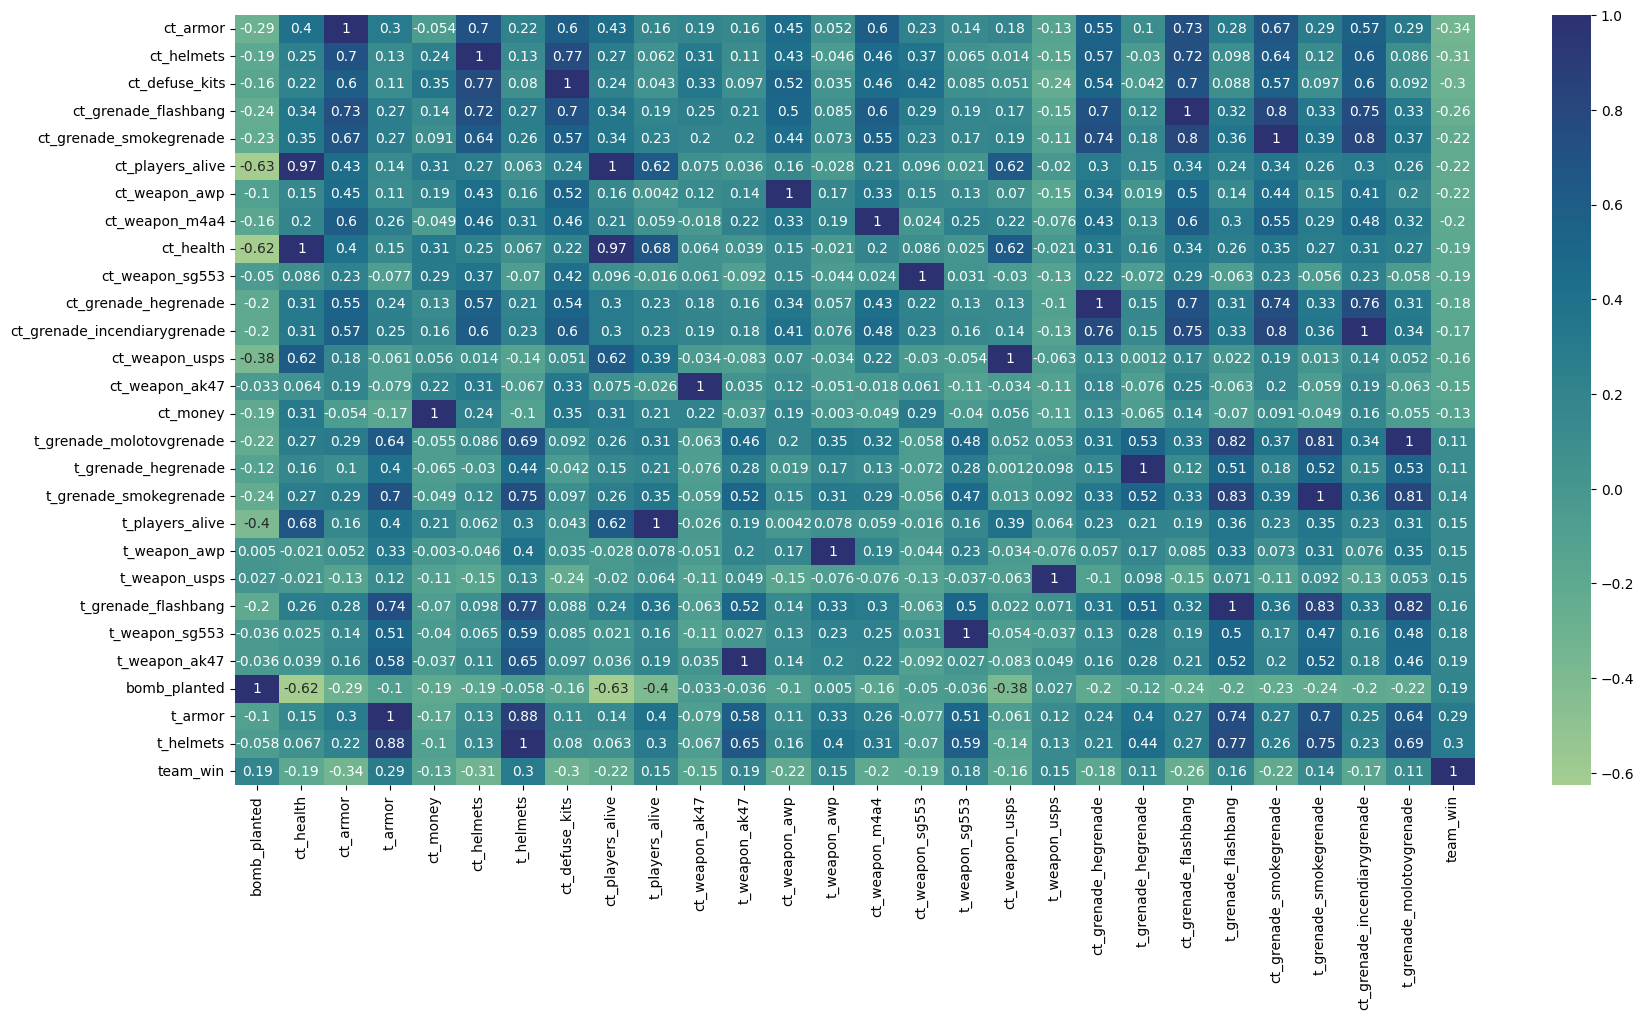

In [187]:
plt.figure(figsize=(20, 10))
sb.heatmap(new_data.corr().sort_values(by="team_win"), cmap="crest", annot=True)

array([[<Axes: title={'center': 'bomb_planted'}>,
        <Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_money'}>],
       [<Axes: title={'center': 'ct_helmets'}>,
        <Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 't_players_alive'}>],
       [<Axes: title={'center': 'ct_weapon_ak47'}>,
        <Axes: title={'center': 't_weapon_ak47'}>,
        <Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 't_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>],
       [<Axes: title={'center': 'ct_weapon_sg553'}>,
        <Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>,
        <Axes: title={'center': 't_weapon_usps'}>,
        <Axes: title={'center': 'ct_grenade_h

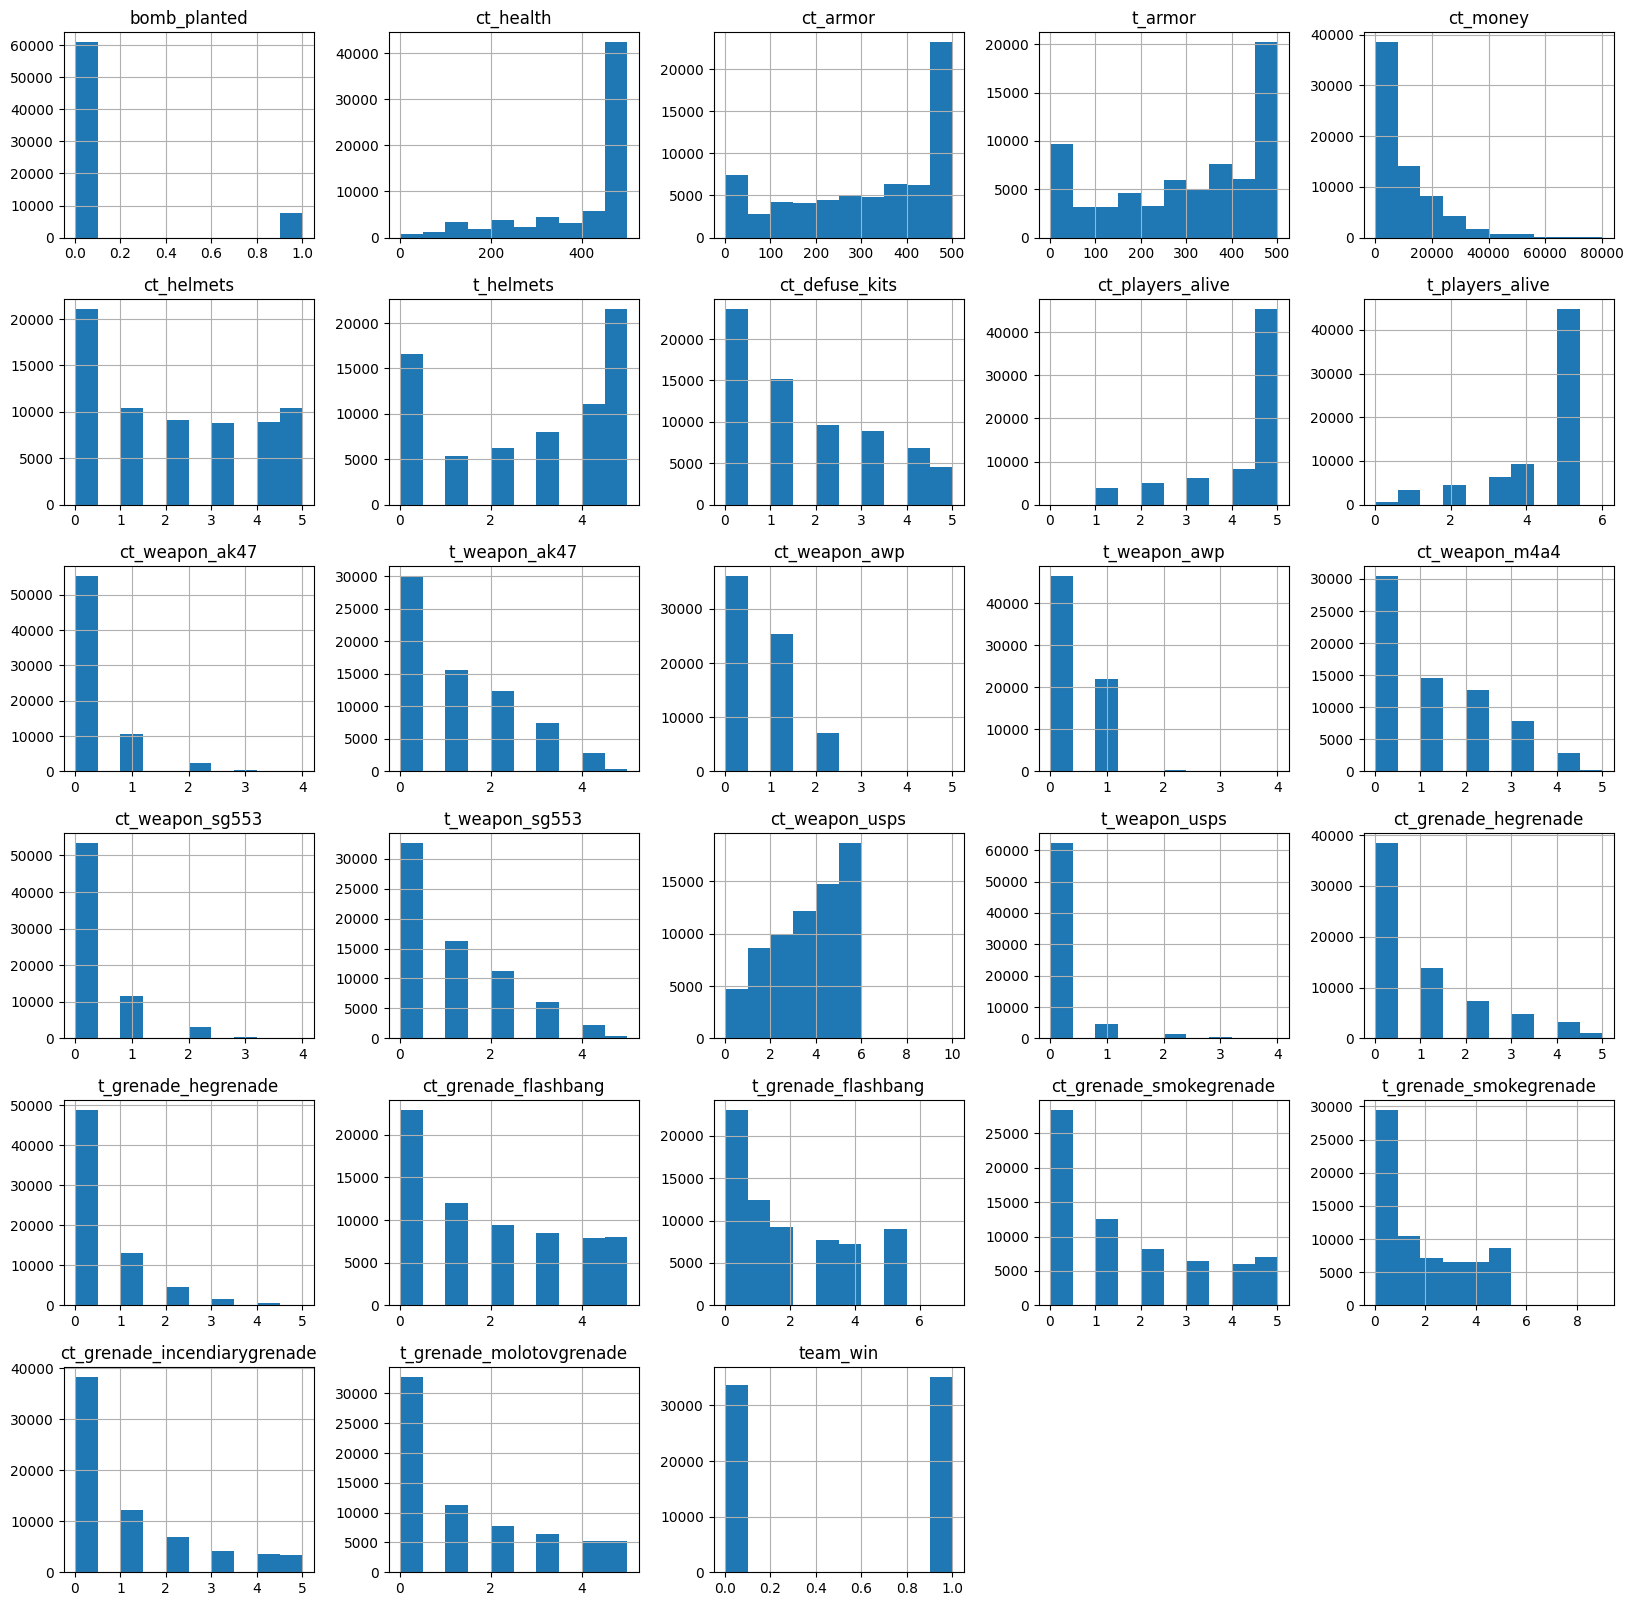

In [194]:
new_data.hist(figsize=(20, 20))

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X, y = new_data.drop(["team_win"], axis=1), new_data["team_win"]

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [193]:
print(" X_train shape",  X_train.shape)
print(" X_test shape",  X_test.shape)
print(" y_train shape",  y_train.shape)
print(" y_test shape", y_test.shape)

 X_train shape (51538, 27)
 X_test shape (17180, 27)
 y_train shape (51538,)
 y_test shape (17180,)


In [195]:
scaler = StandardScaler()

In [196]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [197]:
X_train_scaled

array([[-0.3555145 ,  0.67350902,  0.68266306, ..., -0.35883759,
         1.35062653,  0.38258002],
       [-0.3555145 ,  0.47058287,  1.00997708, ...,  0.18705567,
        -0.01179009,  0.38258002],
       [-0.3555145 ,  0.67350902,  1.0801158 , ..., -0.90473085,
         0.66941822, -0.8206548 ],
       ...,
       [-0.3555145 ,  0.65847745,  0.48393669, ..., -0.35883759,
        -0.01179009, -0.8206548 ],
       [-0.3555145 ,  0.67350902,  1.03920155, ...,  1.82473544,
         2.03183484,  2.18743225],
       [-0.3555145 ,  0.67350902, -0.08886284, ..., -0.90473085,
        -0.6929984 , -0.8206548 ]])

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [229]:
rfc = RandomForestClassifier(300)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300)

In [230]:
rfc.score(X_test_scaled, y_test)

0.8532013969732247

In [201]:
from sklearn.neighbors import KNeighborsClassifier


In [202]:
knc = KNeighborsClassifier(3)
knc.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [203]:
knc.score(X_test_scaled, y_test)

0.8027939464493598

In [204]:
from sklearn.naive_bayes import GaussianNB

In [205]:
gnb = GaussianNB()

In [206]:
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [207]:
gnb.score(X_test_scaled, y_test)

0.7272409778812573

In [208]:
import tensorflow as tf
from tensorflow import keras

In [235]:
model = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=(27,), activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [236]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [237]:
early_stopping = keras.callbacks.EarlyStopping(patience=2)

In [238]:
model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/20
1611/1611 [==============================] - 5s 3ms/step - loss: 0.4663 - accuracy: 0.7490 - val_loss: 0.4526 - val_accuracy: 0.7561
Epoch 2/20
1611/1611 [==============================] - 5s 3ms/step - loss: 0.4502 - accuracy: 0.7569 - val_loss: 0.4481 - val_accuracy: 0.7590
Epoch 3/20
1611/1611 [==============================] - 6s 4ms/step - loss: 0.4445 - accuracy: 0.7618 - val_loss: 0.4492 - val_accuracy: 0.7567
Epoch 4/20
1611/1611 [==============================] - 5s 3ms/step - loss: 0.4384 - accuracy: 0.7664 - val_loss: 0.4388 - val_accuracy: 0.7643
Epoch 5/20
1611/1611 [==============================] - 6s 4ms/step - loss: 0.4324 - accuracy: 0.7727 - val_loss: 0.4367 - val_accuracy: 0.7679
Epoch 6/20
1611/1611 [==============================] - 4s 3ms/step - loss: 0.4257 - accuracy: 0.7758 - val_loss: 0.4366 - val_accuracy: 0.7658
Epoch 7/20
1611/1611 [==============================] - 5s 3ms/step - loss: 0.4192 - accuracy: 0.7806 - val_loss: 0.4383 - val_accuracy: